In [4]:
import pandas as pd
import numpy as np

In [5]:
# Data Loading
file_path = '2018_clean_final.csv'
flight_df = pd.read_csv(file_path, error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721643 entries, 0 to 721642
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              721643 non-null  object 
 1   OP_CARRIER           721643 non-null  object 
 2   CRS_DEP_TIME         721643 non-null  int64  
 3   DEP_DELAY            721643 non-null  float64
 4   TAXI_OUT             721643 non-null  float64
 5   WHEELS_OFF           721643 non-null  float64
 6   WHEELS_ON            721643 non-null  float64
 7   TAXI_IN              721643 non-null  float64
 8   CRS_ARR_TIME         721643 non-null  int64  
 9   ARR_DELAY            721643 non-null  float64
 10  CRS_ELAPSED_TIME     721643 non-null  float64
 11  ACTUAL_ELAPSED_TIME  721643 non-null  float64
 12  AIR_TIME             721643 non-null  float64
 13  DISTANCE             721643 non-null  float64
 14  CARRIER_DELAY        721643 non-null  float64
 15  WEATHER_DELAY    

In [7]:
flight_df.shape

(721643, 31)

In [8]:
flight_df = flight_df.dropna()

In [9]:
flight_df.isnull().sum()


FL_DATE                0
OP_CARRIER             0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Org_Airport            0
Org_latitude           0
Org_longitude          0
Origin_city            0
Dest_Airport           0
Dest_latitude          0
Dest_longitude         0
Dest_city              0
month                  0
Day                    0
MONTH_abbr             0
DELAY_STATUS           0
dtype: int64

In [10]:
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'])
flight_df['WEEKDAY'] = flight_df['FL_DATE'].dt.dayofweek
flight_df.columns

Index(['FL_DATE', 'OP_CARRIER', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Org_Airport', 'Org_latitude', 'Org_longitude',
       'Origin_city', 'Dest_Airport', 'Dest_latitude', 'Dest_longitude',
       'Dest_city', 'month', 'Day', 'MONTH_abbr', 'DELAY_STATUS', 'WEEKDAY'],
      dtype='object')

In [11]:
flight_df.WEEKDAY.value_counts()

0    108663
4    107948
3    107325
2    105206
1    104452
6    101770
5     86278
Name: WEEKDAY, dtype: int64

In [12]:
flight_df.head()

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Org_Airport,Org_latitude,Org_longitude,Origin_city,Dest_Airport,Dest_latitude,Dest_longitude,Dest_city,month,Day,MONTH_abbr,DELAY_STATUS,WEEKDAY
0,2018-01-01,United Airlines,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
1,2018-01-01,United Airlines,1657,161.0,14.0,1952.0,2130.0,7.0,1925,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,1.0,0
2,2018-01-01,United Airlines,600,-1.0,14.0,613.0,806.0,6.0,835,-23.0,275.0,253.0,233.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
3,2018-01-01,United Airlines,1855,11.0,26.0,1932.0,2112.0,12.0,2126,-2.0,271.0,258.0,220.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
4,2018-01-01,United Airlines,1150,-1.0,13.0,1202.0,1353.0,7.0,1418,-18.0,268.0,251.0,231.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0


In [13]:
flight_df['CRS_DEP_TIME'] = np.ceil(flight_df['CRS_DEP_TIME']/600).apply(int)
flight_df['WHEELS_OFF'] = np.ceil(flight_df['WHEELS_OFF']/600).apply(int) 
flight_df['WHEELS_ON'] = np.ceil(flight_df['WHEELS_ON']/600).apply(int)
flight_df['CRS_ARR_TIME'] = np.ceil(flight_df['CRS_ARR_TIME']/600).apply(int)

In [14]:
flight_df.CRS_DEP_TIME.value_counts(normalize=True)

2    0.379627
3    0.368219
4    0.163754
1    0.088400
Name: CRS_DEP_TIME, dtype: float64

In [15]:
flight_df.CRS_ARR_TIME.value_counts(normalize=True)

3    0.338090
2    0.334726
4    0.309584
1    0.017600
Name: CRS_ARR_TIME, dtype: float64

In [16]:
flight_df.head()

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Org_Airport,Org_latitude,Org_longitude,Origin_city,Dest_Airport,Dest_latitude,Dest_longitude,Dest_city,month,Day,MONTH_abbr,DELAY_STATUS,WEEKDAY
0,2018-01-01,United Airlines,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
1,2018-01-01,United Airlines,3,161.0,14.0,4,4,7.0,4,132.0,268.0,239.0,218.0,1605.0,16.0,0.0,0.0,0.0,116.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,1.0,0
2,2018-01-01,United Airlines,1,-1.0,14.0,2,2,6.0,2,-23.0,275.0,253.0,233.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
3,2018-01-01,United Airlines,4,11.0,26.0,4,4,12.0,4,-2.0,271.0,258.0,220.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0
4,2018-01-01,United Airlines,2,-1.0,13.0,3,3,7.0,3,-18.0,268.0,251.0,231.0,1605.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,Denver International Airport,39.861698,-104.672996,Denver,1.0,1.0,Jan,0.0,0


In [17]:
flight_df = flight_df.drop(['MONTH_abbr'], axis=1)
flight_df = flight_df.drop(['Day'], axis=1)
flight_df = flight_df.drop(['Dest_city'], axis=1)
flight_df = flight_df.drop(['Origin_city'], axis=1)
flight_df = flight_df.drop(['FL_DATE'], axis=1)
flight_df = flight_df.drop(['Dest_Airport'], axis=1)
flight_df = flight_df.drop(['Org_Airport'], axis=1)
flight_df = flight_df.drop(['Dest_latitude'], axis=1)
flight_df = flight_df.drop(['Dest_longitude'], axis=1)
flight_df = flight_df.drop(['Org_latitude'], axis=1)
flight_df = flight_df.drop(['Org_longitude'], axis=1)
flight_df = flight_df.drop(['month'], axis=1)
flight_df = flight_df.drop(['WEEKDAY'], axis=1)



In [18]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721642 entries, 0 to 721641
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OP_CARRIER           721642 non-null  object 
 1   CRS_DEP_TIME         721642 non-null  int64  
 2   DEP_DELAY            721642 non-null  float64
 3   TAXI_OUT             721642 non-null  float64
 4   WHEELS_OFF           721642 non-null  int64  
 5   WHEELS_ON            721642 non-null  int64  
 6   TAXI_IN              721642 non-null  float64
 7   CRS_ARR_TIME         721642 non-null  int64  
 8   ARR_DELAY            721642 non-null  float64
 9   CRS_ELAPSED_TIME     721642 non-null  float64
 10  ACTUAL_ELAPSED_TIME  721642 non-null  float64
 11  AIR_TIME             721642 non-null  float64
 12  DISTANCE             721642 non-null  float64
 13  CARRIER_DELAY        721642 non-null  float64
 14  WEATHER_DELAY        721642 non-null  float64
 15  NAS_DELAY        

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [20]:
# Label encoding features to change categorical variables into numerical one
flight_df['OP_CARRIER'] = le.fit_transform(flight_df['OP_CARRIER'])



In [21]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import explained_variance_score

In [22]:
X = flight_df.drop(['DELAY_STATUS','ARR_DELAY','DEP_DELAY'], axis = 1)
X.shape

(721642, 16)

In [23]:
y = flight_df['ARR_DELAY']
y.head(5)

0    -23.0
1    132.0
2    -23.0
3     -2.0
4    -18.0
Name: ARR_DELAY, dtype: float64

In [24]:
 #Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [48]:

Rfc = RandomForestRegressor(random_state=2)

model1 = Rfc.fit(X_train_sc,y_train)
Y_predict=model1.predict(X_test_sc)
print('Random forest Regressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
print('R2 : ',r2_score(y_test, Y_predict))
   

Random forest Regressor
Mean Absolute Error: 4.223075364737445
Mean Squared Error: 52.11508554294826
Root Mean Squared Error: 7.219077887303077
R2 :  0.9730292886661528


In [50]:
results1 = pd.DataFrame({"Prediction": Y_predict, "Actual": y_test}).reset_index(drop=True)
results1.head(10)

,Prediction,Actual
0,-0.620000,-7.0
1,-9.020000,-15.0
2,5.680000,7.0
3,16.000000,16.0
4,-9.590000,4.0
5,-5.792500,-8.0
6,-11.826667,-13.0
7,-17.040000,-18.0
8,-1.660000,-5.0
9,1.810000,-3.0


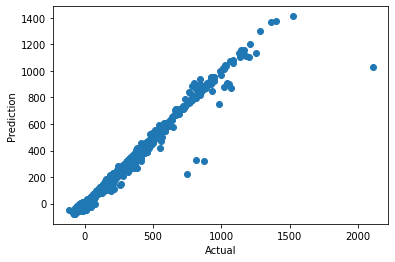

In [27]:
plt.scatter( y_test, Y_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [28]:
explained_variance_score(y_test, Y_predict)

0.9730378054765952

In [29]:
print("Accuracy score (training): {0:.3f}".format(model1.score(X_train_sc, y_train)))
print("Accuracy score (validation): {0:.3f}".format( model1.score( X_test_sc, y_test)))


Accuracy score (training): 0.996
Accuracy score (validation): 0.973


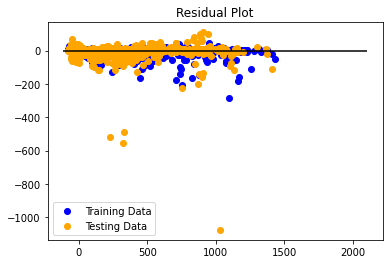

In [49]:
# Plot the residuals for the training and testing data.

### BEGIN SOLUTION
plt.scatter(model1.predict(X_train_sc), model1.predict(X_train_sc) - y_train, c="blue", label="Training Data")
plt.scatter(model1.predict(X_test_sc), model1.predict(X_test_sc) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [51]:
LinR = LinearRegression() 

model2 = LinR.fit(X_train_sc,y_train)
Y_predict=model2.predict(X_test_sc)
print('Linear Regression')
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
print('R2 : ',r2_score(y_test, Y_predict))

Linear Regression
Mean Absolute Error: 5.923395117562025
Mean Squared Error: 61.39810126120699
Root Mean Squared Error: 7.83569405102107
R2 :  0.9682251223746403


In [52]:
results2 = pd.DataFrame({"Prediction": Y_predict, "Actual": y_test}).reset_index(drop=True)
results2.head(10)

,Prediction,Actual
0,-6.799629,-7.0
1,-9.053658,-15.0
2,4.210836,7.0
3,24.286605,16.0
4,-9.710967,4.0
5,-6.546491,-8.0
6,-13.673551,-13.0
7,-12.637605,-18.0
8,-5.419645,-5.0
9,-4.437826,-3.0


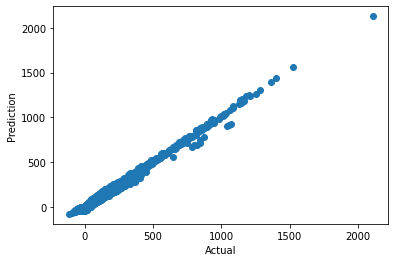

In [53]:
plt.scatter( y_test, Y_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [54]:
explained_variance_score(y_test, Y_predict)

0.9682273651087598

In [55]:
print("Accuracy score (training): {0:.3f}".format(model2.score(X_train_sc, y_train)))
print("Accuracy score (validation): {0:.3f}".format( model2.score( X_test_sc, y_test)))

Accuracy score (training): 0.970
Accuracy score (validation): 0.968


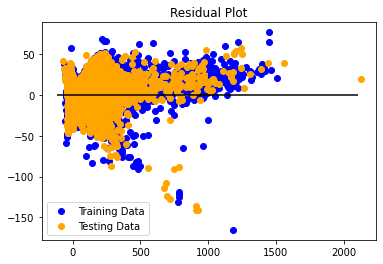

In [56]:
# Plot the residuals for the training and testing data.

### BEGIN SOLUTION
plt.scatter(model2.predict(X_train_sc), model2.predict(X_train_sc) - y_train, c="blue", label="Training Data")
plt.scatter(model2.predict(X_test_sc), model2.predict(X_test_sc) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

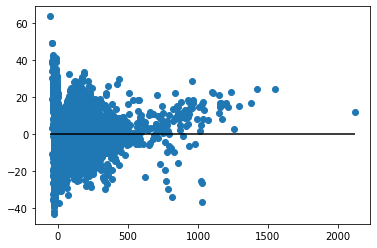

In [47]:
# Plot Residuals
plt.scatter(Y_predict, Y_predict - y_test)
plt.hlines(y=0, xmin=Y_predict.min(), xmax=Y_predict.max())
plt.show()

In [57]:
Dtc = DecisionTreeRegressor(random_state = 2)
model3 = Dtc.fit(X_train_sc,y_train)
Y_predict=model3.predict(X_test_sc)
print('Decision Tree Regressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
print('R2 : ',r2_score(y_test, Y_predict))

Decision Tree Regressor
Mean Absolute Error: 5.824072316865849
Mean Squared Error: 94.31427715391824
Root Mean Squared Error: 9.711553797097467
R2 :  0.9511902721202963


In [58]:
results3 = pd.DataFrame({"Prediction": Y_predict, "Actual": y_test}).reset_index(drop=True)
results3.head(10)

,Prediction,Actual
0,-3.0,-7.0
1,-7.0,-15.0
2,0.0,7.0
3,16.0,16.0
4,-16.0,4.0
5,0.0,-8.0
6,8.0,-13.0
7,-15.0,-18.0
8,-7.0,-5.0
9,-1.0,-3.0


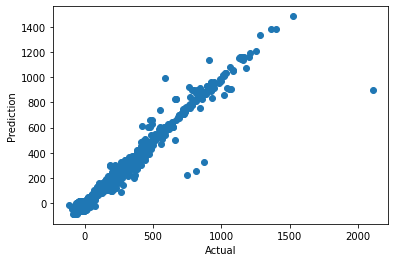

In [59]:
plt.scatter( y_test, Y_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [60]:
explained_variance_score(y_test, Y_predict)

0.9512020509844533

In [61]:
print("Accuracy score (training): {0:.3f}".format(model3.score(X_train_sc, y_train)))
print("Accuracy score (validation): {0:.3f}".format( model3.score( X_test_sc, y_test)))

Accuracy score (training): 1.000
Accuracy score (validation): 0.951


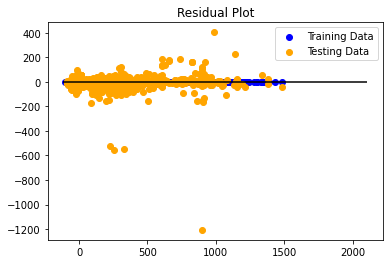

In [62]:
plt.scatter(model3.predict(X_train_sc), model3.predict(X_train_sc) - y_train, c="blue", label="Training Data")
plt.scatter(model3.predict(X_test_sc), model3.predict(X_test_sc) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [63]:
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
model4 = Boost_Lin.fit(X_train_sc,y_train)
Y_predict=model4.predict(X_test_sc)
print('Boosted Linear')
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
print('R2 : ',r2_score(y_test, Y_predict))


Boosted Linear
Mean Absolute Error: 6.437352747489798
Mean Squared Error: 66.24295123958612
Root Mean Squared Error: 8.138977284621584
R2 :  0.9657178051773008


In [64]:
results4 = pd.DataFrame({"Prediction": Y_predict, "Actual": y_test}).reset_index(drop=True)
results4.head(10)

,Prediction,Actual
0,-6.141540,-7.0
1,-7.821888,-15.0
2,-0.643276,7.0
3,23.400133,16.0
4,-8.446890,4.0
5,-6.578786,-8.0
6,-12.575425,-13.0
7,-11.315796,-18.0
8,-6.700124,-5.0
9,-5.158760,-3.0


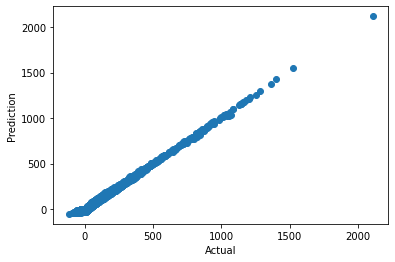

In [65]:
plt.scatter( y_test, Y_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [66]:
explained_variance_score(y_test, Y_predict)

0.9657297072881852

In [67]:
print("Accuracy score (training): {0:.3f}".format(model4.score(X_train_sc, y_train)))
print("Accuracy score (validation): {0:.3f}".format( model4.score( X_test_sc, y_test)))

Accuracy score (training): 0.968
Accuracy score (validation): 0.966


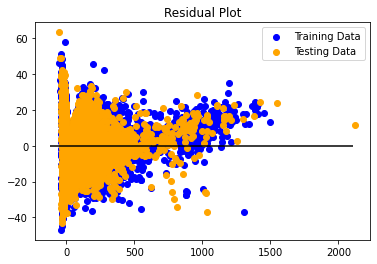

In [68]:
plt.scatter(model4.predict(X_train_sc), model4.predict(X_train_sc) - y_train, c="blue", label="Training Data")
plt.scatter(model4.predict(X_test_sc), model4.predict(X_test_sc) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [69]:
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)

model5 = Bg_Lin.fit(X_train_sc,y_train)
Y_predict=model5.predict(X_test_sc)
print('Bagging  Regressor')
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
print('R2 : ',r2_score(y_test, Y_predict))

Bagging  Regressor
Mean Absolute Error: 5.918814191014616
Mean Squared Error: 61.42008473273903
Root Mean Squared Error: 7.8370967030360825
R2 :  0.9682137454410974


In [70]:
results5 = pd.DataFrame({"Prediction": Y_predict, "Actual": y_test}).reset_index(drop=True)
results5.head(10)

,Prediction,Actual
0,-6.768024,-7.0
1,-9.077236,-15.0
2,4.253937,7.0
3,24.248227,16.0
4,-9.707066,4.0
5,-6.533298,-8.0
6,-13.686988,-13.0
7,-12.657758,-18.0
8,-5.368528,-5.0
9,-4.430467,-3.0


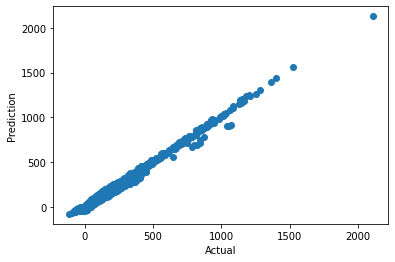

In [71]:
plt.scatter( y_test, Y_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [72]:
explained_variance_score(y_test, Y_predict)

0.9682157395960815

In [73]:
print("Accuracy score (training): {0:.3f}".format(model5.score(X_train_sc, y_train)))
print("Accuracy score (validation): {0:.3f}".format( model5.score( X_test_sc, y_test)))

Accuracy score (training): 0.970
Accuracy score (validation): 0.968


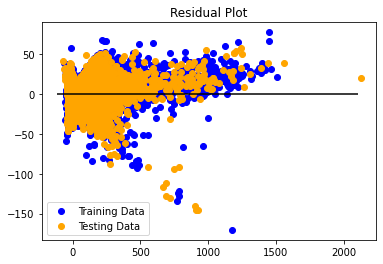

In [74]:
plt.scatter(model5.predict(X_train_sc), model5.predict(X_train_sc) - y_train, c="blue", label="Training Data")
plt.scatter(model5.predict(X_test_sc), model5.predict(X_test_sc) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()